In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
NUM_CLASSES = 6
CLASSES = ["sadnesss", "joy", "love", "anger", "fear"]
WEIGHTS = torch.tensor([0.00287505, 0.00246512, 0.01015641, 0.00615233, 0.00702346, 0.02318034])

In [3]:
# Load all data
train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")
validation_data = pd.read_csv("data/validation.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = ["text"]
LABEL_COLUMN = "label"

X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

# These are used to run val and test for Neural Nets
X_val_test = pd.concat([X_val, X_test])
Y_val_test = pd.concat([Y_val, Y_test])

In [4]:
X_train_maxtoks = X_train['text'].str.len().max()
X_test_maxtoks = X_test['text'].str.len().max()
X_val_maxtoks = X_val['text'].str.len().max() 

max_toks = max(X_train_maxtoks, X_test_maxtoks, X_val_maxtoks)
print(max_toks)

300


# Data Loaders

In [5]:
# Pytorch specific constants
from torch.utils.data import TensorDataset, DataLoader
from extractors.chartok import  CharTokenDataset
from utils.neuralnet import NeuralNetwork
from utils.rnn import LSTMNetwork
from utils.transformer import TransformerEncoder
from utils.trainer import training_loop, evaluate
import torch

BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 1000

# Standard 1 Layer Perceptron

In [6]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [7]:
mlp = NeuralNetwork(max_toks, [], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/slpseq")

Epoch 1
train_loss = 14.1319, val_loss = 10.9809
Epoch 2
train_loss = 6.5794, val_loss = 9.5080
Epoch 3
train_loss = 8.4462, val_loss = 8.2256
Epoch 4
train_loss = 7.7316, val_loss = 6.9677
Epoch 5
train_loss = 6.8705, val_loss = 6.1499
Epoch 6
train_loss = 4.3087, val_loss = 5.1636
Epoch 7
train_loss = 3.0715, val_loss = 4.5402
Epoch 8
train_loss = 4.3688, val_loss = 3.9496
Epoch 9
train_loss = 4.2144, val_loss = 3.4908
Epoch 10
train_loss = 3.4534, val_loss = 3.1620
Epoch 11
train_loss = 2.4173, val_loss = 2.8750
Epoch 12
train_loss = 1.7483, val_loss = 2.6542
Epoch 13
train_loss = 2.5290, val_loss = 2.4934
Epoch 14
train_loss = 2.4047, val_loss = 2.3615
Epoch 15
train_loss = 3.1587, val_loss = 2.2878
Epoch 16
train_loss = 2.4034, val_loss = 2.1799
Epoch 17
train_loss = 1.6722, val_loss = 2.1088
Epoch 18
train_loss = 2.1270, val_loss = 2.0980
Epoch 19
train_loss = 1.7642, val_loss = 2.0686
Epoch 20
train_loss = 1.9087, val_loss = 2.0157
Epoch 21
train_loss = 2.0510, val_loss = 1.9927

loss = 1.5597
accuracy = 0.3255
f1 = 0.2454
[[0.27750411 0.29680697 0.         0.125      0.4        0.        ]
 [0.34154351 0.34833091 0.         0.625      0.4        0.        ]
 [0.09031199 0.0754717  0.         0.         0.         0.        ]
 [0.15106732 0.13207547 0.         0.125      0.         0.        ]
 [0.11494253 0.11030479 0.         0.125      0.2        0.        ]
 [0.02463054 0.03701016 0.         0.         0.         0.        ]]


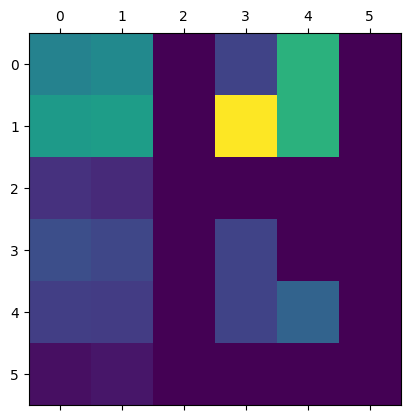

In [11]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# Standard MLP

In [12]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [13]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/mlpseq")

Epoch 1
train_loss = 1.8094, val_loss = 1.6573
Epoch 2
train_loss = 1.5916, val_loss = 1.6417
Epoch 3
train_loss = 1.9723, val_loss = 1.6161
Epoch 4
train_loss = 1.6197, val_loss = 1.6175
Epoch 5
train_loss = 1.6450, val_loss = 1.6062
Epoch 6
train_loss = 1.4792, val_loss = 1.5986
Epoch 7
train_loss = 1.5470, val_loss = 1.5908
Epoch 8
train_loss = 1.5290, val_loss = 1.5840
Epoch 9
train_loss = 1.6139, val_loss = 1.5859
Epoch 10
train_loss = 1.5240, val_loss = 1.5824
Epoch 11
train_loss = 1.6363, val_loss = 1.5814
Epoch 12
train_loss = 1.5971, val_loss = 1.5804
Epoch 13
train_loss = 1.6183, val_loss = 1.5810
Epoch 14
train_loss = 1.6104, val_loss = 1.5789
Epoch 15
train_loss = 1.6257, val_loss = 1.5820
Epoch 16
train_loss = 1.5896, val_loss = 1.5794
Epoch 17
train_loss = 1.4972, val_loss = 1.5807
Epoch 18
train_loss = 1.6194, val_loss = 1.5790
Epoch 19
train_loss = 1.4347, val_loss = 1.5831
Epoch 20
train_loss = 1.5140, val_loss = 1.5819
Epoch 21
train_loss = 1.6526, val_loss = 1.5789
E

KeyboardInterrupt: 

loss = 1.5655
accuracy = 0.3370
f1 = 0.2498
[[0.29693487 0.28834356 0.         0.33333333 0.2        0.        ]
 [0.33333333 0.3524199  0.         0.16666667 0.6        0.        ]
 [0.07279693 0.08248125 0.         0.         0.         0.        ]
 [0.13601533 0.13769598 0.         0.33333333 0.         0.        ]
 [0.13409962 0.10497614 0.         0.         0.         0.        ]
 [0.02681992 0.03408316 0.         0.16666667 0.2        0.        ]]


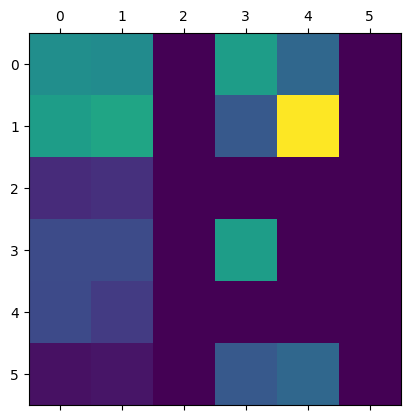

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# MLP With Weighting

In [22]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=100, learning_rate=LEARNING_RATE, path="models/mlpseqwt", weights=WEIGHTS)

Epoch 1
train_loss = 1.8480, val_loss = 1.7948
Epoch 2
train_loss = 1.8218, val_loss = 1.7905
Epoch 3
train_loss = 1.7990, val_loss = 1.7903
Epoch 4
train_loss = 1.8236, val_loss = 1.7907
Epoch 5
train_loss = 1.8086, val_loss = 1.7910
Epoch 6
train_loss = 1.8081, val_loss = 1.7913
Epoch 7
train_loss = 1.7710, val_loss = 1.7918
Epoch 8
train_loss = 1.7972, val_loss = 1.7921
Epoch 9
train_loss = 1.7786, val_loss = 1.7915
Epoch 10
train_loss = 1.8080, val_loss = 1.7923
Epoch 11
train_loss = 1.7877, val_loss = 1.7914
Epoch 12
train_loss = 1.8164, val_loss = 1.7925
Epoch 13
train_loss = 1.7978, val_loss = 1.7925
Epoch 14
train_loss = 1.7928, val_loss = 1.7924
Epoch 15
train_loss = 1.7945, val_loss = 1.7932
Epoch 16
train_loss = 1.7733, val_loss = 1.7929
Epoch 17
train_loss = 1.7933, val_loss = 1.7928
Epoch 18
train_loss = 1.7930, val_loss = 1.7924
Epoch 19
train_loss = 1.7931, val_loss = 1.7931
Epoch 20
train_loss = 1.7798, val_loss = 1.7928
Epoch 21
train_loss = 1.7913, val_loss = 1.7927
E

loss = 1.7698
accuracy = 0.2635
f1 = 0.2607
[[0.34782609 0.25952045 0.26666667 0.2754717  0.26582278 0.31707317]
 [0.33277592 0.35260931 0.36       0.38113208 0.33333333 0.29268293]
 [0.06521739 0.09308886 0.07333333 0.06792453 0.092827   0.07317073]
 [0.10200669 0.15937941 0.18666667 0.10188679 0.16455696 0.17073171]
 [0.10702341 0.10014104 0.08       0.1509434  0.13080169 0.14634146]
 [0.0451505  0.03526093 0.03333333 0.02264151 0.01265823 0.        ]]


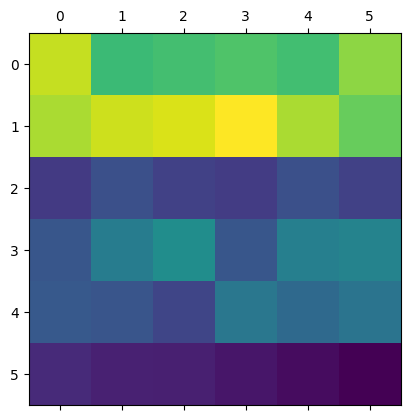

In [24]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# RNN

In [8]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [24]:
lstm = LSTMNetwork(40, 100, 10, NUM_CLASSES)
training_loop(lstm, train_loader, val_loader, epochs=200, is_seq=True, learning_rate=LEARNING_RATE, path="models/lstmseq", weights=WEIGHTS, min_epoch=200)
torch.save(lstm.state_dict(), "models/lstmseq")

Epoch 1
train_loss = 1.7882, val_loss = 1.7931
Epoch 2
train_loss = 1.8260, val_loss = 1.7939
Epoch 3
train_loss = 1.7908, val_loss = 1.7924
Epoch 4
train_loss = 1.7708, val_loss = 1.7925
Epoch 5
train_loss = 1.7943, val_loss = 1.7918
Epoch 6
train_loss = 1.7822, val_loss = 1.7915
Epoch 7
train_loss = 1.8270, val_loss = 1.7942
Epoch 8
train_loss = 1.8130, val_loss = 1.7926
Epoch 9
train_loss = 1.7885, val_loss = 1.7944
Epoch 10
train_loss = 1.7661, val_loss = 1.7928
Epoch 11
train_loss = 1.7836, val_loss = 1.7929
Epoch 12
train_loss = 1.8205, val_loss = 1.7944
Epoch 13
train_loss = 1.8072, val_loss = 1.7950
Epoch 14
train_loss = 1.7822, val_loss = 1.7927
Epoch 15
train_loss = 1.8481, val_loss = 1.7922
Epoch 16
train_loss = 1.7848, val_loss = 1.7923
Epoch 17
train_loss = 1.7909, val_loss = 1.7921
Epoch 18
train_loss = 1.7669, val_loss = 1.7921
Epoch 19
train_loss = 1.8121, val_loss = 1.7944
Epoch 20
train_loss = 1.8022, val_loss = 1.7946
Epoch 21
train_loss = 1.7814, val_loss = 1.7928
E

loss = 1.7578
accuracy = 0.2540
f1 = 0.2442
[[0.30749682 0.28314239 0.25454545 0.30735931 0.24782609 0.32258065]
 [0.33036849 0.33224223 0.43636364 0.36363636 0.40869565 0.19354839]
 [0.07115629 0.09328969 0.06363636 0.07792208 0.0826087  0.06451613]
 [0.14358323 0.14075286 0.11818182 0.12554113 0.12608696 0.16129032]
 [0.11435832 0.11129296 0.10909091 0.09090909 0.11304348 0.22580645]
 [0.03303685 0.03927987 0.01818182 0.03463203 0.02173913 0.03225806]]


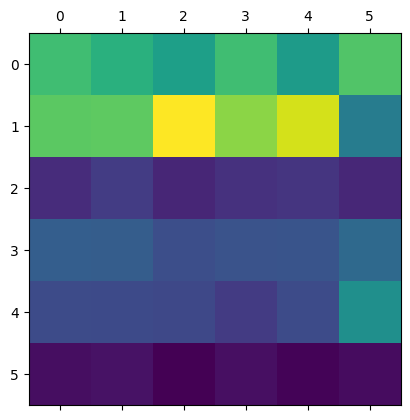

In [26]:
_, _, _, cmat = evaluate(model=lstm, val_dl=test_loader, is_seq=True)
print(cmat)
plt.matshow(cmat)
plt.show()

# Transformer

In [27]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [31]:
transformer = TransformerEncoder(max_toks, NUM_CLASSES, 10, 5, 4, ff=10, dropout=0.1)
training_loop(transformer, train_loader,val_loader,  is_seq=True,  epochs=EPOCHS, learning_rate=LEARNING_RATE)
torch.save(transformer.state_dict(), "models/xformerseq")

Epoch 1
train_loss = 1.6508, val_loss = 1.6222
Epoch 2
train_loss = 1.5769, val_loss = 1.5946
Epoch 3
train_loss = 1.4551, val_loss = 1.5910
Epoch 4
train_loss = 1.5014, val_loss = 1.5814
Epoch 5
train_loss = 1.5917, val_loss = 1.5837
Epoch 6
train_loss = 1.6480, val_loss = 1.5811
Epoch 7
train_loss = 1.5471, val_loss = 1.5830
Epoch 8
train_loss = 1.6141, val_loss = 1.5803
Epoch 9
train_loss = 1.4598, val_loss = 1.5804
Epoch 10
train_loss = 1.5913, val_loss = 1.5794
Epoch 11
train_loss = 1.7146, val_loss = 1.5803
Epoch 12
train_loss = 1.6829, val_loss = 1.5799
Epoch 13
train_loss = 1.5592, val_loss = 1.5818
Epoch 14
train_loss = 1.5192, val_loss = 1.5815
Epoch 15
train_loss = 1.5419, val_loss = 1.5823
Epoch 16
train_loss = 1.6418, val_loss = 1.5798
Epoch 17
train_loss = 1.7238, val_loss = 1.5816
Epoch 18
train_loss = 1.4821, val_loss = 1.5809
Epoch 19
train_loss = 1.4655, val_loss = 1.5792
Epoch 20
train_loss = 1.4532, val_loss = 1.5812
Epoch 21
train_loss = 1.7097, val_loss = 1.5850
E

loss = 1.5590
accuracy = 0.3295
f1 = 0.2509
[[0.28120063 0.29416112 0.         0.41666667 0.         0.        ]
 [0.34123223 0.35254989 0.         0.08333333 0.5        0.        ]
 [0.08530806 0.07612712 0.         0.16666667 0.         0.        ]
 [0.14691943 0.1322986  0.         0.25       0.         0.        ]
 [0.10900474 0.11308204 0.         0.08333333 0.5        0.        ]
 [0.03633491 0.03178123 0.         0.         0.         0.        ]]


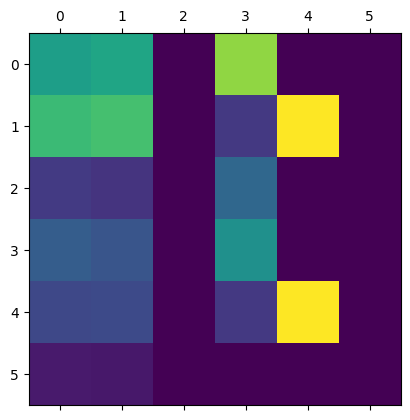

In [32]:
_, _, _, cmat = evaluate(model=transformer, val_dl=test_loader, is_seq=True)
print(cmat)
plt.matshow(cmat)
plt.show()